In [1]:
from os import listdir
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pylab import rcParams

In [18]:
a_traincsv = listdir('../raw_data/training_A/')
b_traincsv = listdir('../raw_data/training_B/')

with open('../csv_data/train_patient.csv', 'w') as csvoutput:
    writer = csv.writer(csvoutput, lineterminator='\n')
    
    for ind, csv_name in enumerate(a_traincsv):
        with open('../raw_data/training_A/'+ csv_name,'r') as csvinput:
            reader = csv.reader(csvinput, delimiter='|')
            all = []
            if ind ==0 :
                row = next(reader)
                row.append('Patient_id')
                row.append('time')
                all.append(row)
            else:
                row = next(reader)

            for i,row in enumerate(reader):
                row.append(ind)
                row.append(i)
                all.append(row)
            writer.writerows(all)
        num = ind 

    for inde, csv_name in enumerate(b_traincsv):
        if inde < 10000:
            num = num+1
        with open('../raw_data/training_B/'+ csv_name,'r') as csvinput:
            reader = csv.reader(csvinput, delimiter='|')
            all = []
            row = next(reader)
            for i,row in enumerate(reader):
                row.append(num)
                row.append(i)
                all.append(row)
            writer.writerows(all)

In [22]:
df=pd.read_csv('../data/train_patient.csv')
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,160.0,77.27,1,0.0,1.0,-69.14,3,0,0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,77.27,1,0.0,1.0,-69.14,4,0,0,1
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,5,0,0,2
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,6,0,0,3
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,7,0,0,4


In [24]:
with open('../csv_data/val_patient.csv', 'w') as csvoutput:
    writer = csv.writer(csvoutput, lineterminator='\n')
    
    for inde, csv_name in enumerate(b_traincsv):
        if inde >=10000 and inde <15000:
            with open('../raw_data/training_B/'+ csv_name,'r') as csvinput:
                reader = csv.reader(csvinput, delimiter='|')
                all = []
                if inde ==10000 :
                    row = next(reader)
                    row.append('Patient_id')
                    row.append('time')
                    all.append(row)
                else:
                    row = next(reader)

                for i,row in enumerate(reader):
                    row.append(inde)
                    row.append(i)
                    all.append(row)
                writer.writerows(all)

In [25]:
df=pd.read_csv('../data/val_patient.csv')
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,109.0,94.0,37.4,192.0,156.0,128.0,19.0,NaN,NaN,NaN,...,NaN,43,0,1.0,0.0,-8.35,2,0,10000,0
1,111.5,94.5,NaN,143.0,103.5,79.0,17.5,NaN,NaN,NaN,...,NaN,43,0,1.0,0.0,-8.35,3,0,10000,1
2,102.0,95.0,NaN,161.0,124.0,99.0,16.0,NaN,NaN,NaN,...,NaN,43,0,1.0,0.0,-8.35,4,0,10000,2
3,113.0,95.0,36.7,177.0,138.0,112.0,18.0,NaN,NaN,NaN,...,NaN,43,0,1.0,0.0,-8.35,5,0,10000,3
4,103.0,91.0,NaN,159.0,119.0,93.0,19.0,NaN,NaN,NaN,...,NaN,43,0,1.0,0.0,-8.35,6,0,10000,4


In [30]:
with open('../csv_data/test_patient.csv', 'w') as csvoutput:
    writer = csv.writer(csvoutput, lineterminator='\n')
    
    for inde, csv_name in enumerate(b_traincsv):
        if inde >=15000:
            with open('../raw_data/training_B/'+ csv_name,'r') as csvinput:
                reader = csv.reader(csvinput, delimiter='|')
                all = []
                if inde ==15000 :
                    row = next(reader)
                    row.append('Patient_id')
                    row.append('time')
                    all.append(row)
                else:
                    row = next(reader)

                for i,row in enumerate(reader):
                    row.append(inde)
                    row.append(i)
                    all.append(row)

                writer.writerows(all)

In [31]:
df=pd.read_csv('../csv_data/test_patient.csv')
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71,1,0.0,1.0,-48.14,1,0,15000,0
1,82.0,96.0,36.5,116.0,83.0,74.0,NaN,NaN,NaN,NaN,...,NaN,71,1,0.0,1.0,-48.14,2,0,15000,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71,1,0.0,1.0,-48.14,3,0,15000,2
3,81.0,100.0,36.6,103.0,77.0,66.0,NaN,NaN,NaN,NaN,...,NaN,71,1,0.0,1.0,-48.14,4,0,15000,3
4,83.0,97.0,36.5,108.0,70.0,62.5,23.0,NaN,NaN,NaN,...,NaN,71,1,0.0,1.0,-48.14,5,0,15000,4


### total number of patients

In [32]:
train = pd.read_csv('../csv_data/train_patient.csv')
train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,160.0,77.27,1,0.0,1.0,-69.14,3,0,0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,77.27,1,0.0,1.0,-69.14,4,0,0,1
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,5,0,0,2
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,6,0,0,3
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,7,0,0,4


In [34]:
len(train['Patient_id'].unique())

30336

### total number of sepsis patients

In [41]:
sepsis = np.array(train.groupby(['Patient_id'])['SepsisLabel'].sum())
len(sepsis[sepsis > 0])

2359

### number of hours a patient spends in Hospital

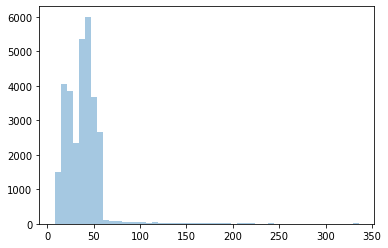

In [73]:
patient_time = np.array(train.groupby(['Patient_id'])['SepsisLabel'].count())
sns.distplot(patient_time[:-1], kde=False);

### remove patients with more than 60 hours 

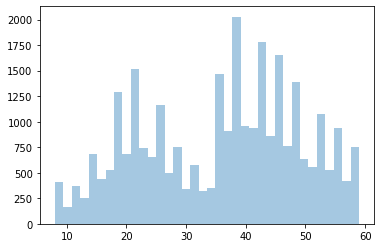

In [76]:
agg_patient_time = patient_time[patient_time < 60]
sns.distplot(agg_patient_time, kde=False);

### total number of patients with time <=60

In [79]:
temp = train.groupby(['Patient_id'])['SepsisLabel'].count().reset_index()
sel_pid = np.array(temp[temp['SepsisLabel'] <=60]['Patient_id'])
patient_train = train[train['Patient_id'].isin(sel_pid)]
len(patient_train['Patient_id'].unique())

29414

### total number of sepsis patients with time <=60

In [80]:
sepsis_train = np.array(patient_train.groupby(['Patient_id']) \
                          ['SepsisLabel'].sum())

len(sepsis_train[sepsis_train > 0])

1548

After removing patients with more than 60 hours , we see that loose a considerable amount of patients from the positive class. Hence they are not being removed for the moment

### Time at which a patient contracts Sepsis

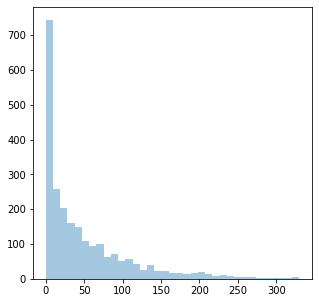

In [85]:
temp = train.groupby(['Patient_id'])['SepsisLabel'].sum().reset_index()
sepsis_train_pid = np.array(temp[temp['SepsisLabel'] > 0]['Patient_id'])
temp = train[train['Patient_id'].isin(sepsis_train_pid)]
sepsis_time = []
tot_time = []
for pid in sepsis_train_pid:
    df = temp[temp['Patient_id']==pid]
    sepsis_time.append(df[df['SepsisLabel']==1]['time'].iloc[0])
    tot_time.append(df[df['SepsisLabel']==1]['time'][::-1].iloc[0])
rcParams['figure.figsize'] = 5, 5
sns.distplot(sepsis_time, kde=False);

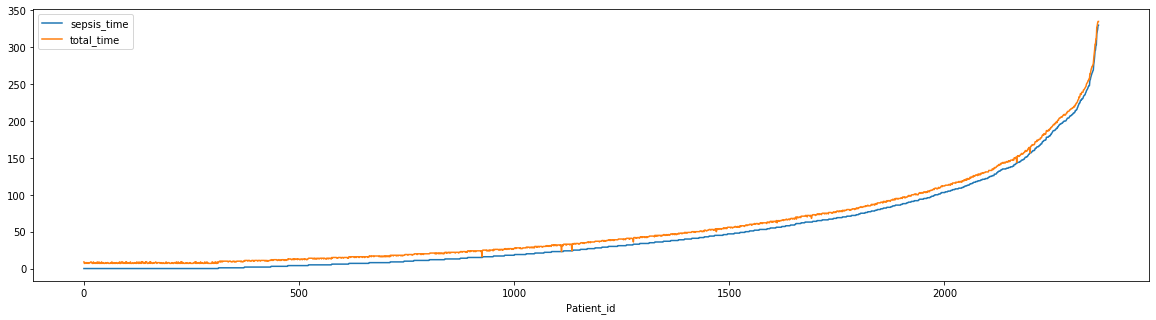

In [86]:
temp = pd.DataFrame()
temp['pid'] = sepsis_train_pid
temp['sepsis_time'] = sepsis_time
temp['tot_time'] = tot_time
temp.sort_values(by=['sepsis_time'], inplace=True)
temp['level'] = temp.reset_index().index
rcParams['figure.figsize'] = 20, 5
plt.plot(temp['level'], temp['sepsis_time'])
plt.plot(temp['level'], temp['tot_time'])
_ = plt.xlabel('Patient_id')
_ = plt.legend(['sepsis_time', 'total_time'])

In [66]:
file_info=pd.read_csv('processed_data/file_info.csv',index_col = 0)
file_info

,FileName,TypeSepsis,Sex,Age,Length,LenTime
0,p000001.csv,0,0,82.14,54,258.000000
1,p000002.csv,0,0,74.91,23,258.000000
2,p000003.csv,0,0,44.82,48,258.000000
3,p000004.csv,0,0,64.71,29,258.000000
4,p000005.csv,0,1,27.09,48,258.000000
...,...,...,...,...,...,...
20331,p020639.csv,0,1,58.14,26,105.666667
20332,p020640.csv,0,0,73.53,25,87.500000
20333,p020641.csv,0,1,32.01,21,69.333333
20334,p020642.csv,0,0,68.80,42,51.166667


In [76]:
file_info[file_info['FileName'] == 'p000001.csv']['TypeSepsis']

0    0
Name: TypeSepsis, dtype: int64

In [118]:
import os
import random

In [106]:
def load_SepsisData_info(data_dir):
    file_info = pd.read_csv(os.path.join(data_dir, 'file_info.csv'))
    data_length_list=file_info.groupby('Length')['Length'].count().index.tolist()
    data_length_count_list = file_info.groupby('Length')['Length'].count().tolist()
    for i in range(len(data_length_list)):
        if (data_length_list[i] > 1):    
            return data_length_list[i:],data_length_count_list[i:]

def load_SepsisData(data_dir,data_length,set_number):
    file_info = pd.read_csv(os.path.join(data_dir, 'file_info.csv'))
    file_list=file_info[file_info['Length'] == data_length]['FileName'].to_list()
    DATA = [[[0] for i in range(set_number)]for i in range(data_length)]
    LABEL=[[0] for i in range(set_number)]
    for number in range(set_number):
        data=pd.read_csv(os.path.join(data_dir, file_list[number]))
        for length in range(data_length):
            data_line=data.iloc[length].to_list()
            DATA[length][number]=data_line
        if(file_info[file_info['FileName'] == file_list[number]]['TypeSepsis'].values[0]==0):
            LABEL[number]=[1,0]
        else:
            LABEL[number] = [0,1]
    return DATA,LABEL

In [121]:
data_length_list,data_length_count_list=load_SepsisData_info('processed_data')
data,label=load_SepsisData('processed_data',data_length_list[0],data_length_count_list[0])

In [122]:
data

[[[91.0,
   94.5,
   37.44,
   84.0,
   59.33,
   nan,
   23.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   7.6,
   nan,
   nan,
   nan,
   nan,
   nan,
   1.9,
   nan,
   3.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  [70.0,
   100.0,
   38.0,
   132.0,
   89.0,
   64.0,
   12.0,
   nan,
   3.0,
   nan,
   0.4,
   7.45,
   38.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  [88.0,
   100.0,
   38.2,
   114.0,
   78.0,
   58.0,
   14.0,
   nan,
   3.0,
   24.0,
   0.5,
   7.46,
   37.0,
   89.0,
   nan,
   43.0,
   nan,
   7.8,
   103.0,
   6.6,
   nan,
   116.0,
   1.6,
   2.0,
   7.5,
   4.3,
   nan,
   nan,
   28.1,
   10.0,
   31.7,
   10.2,
   nan,
   135.0],
  [99.0,
   100.0,
   36.06,
   144.0,
   70.0,
   80.0,
   38.0,
   nan,
   -3.0,
   23.0,
   0.5,
   7.05,
   65.0,
   nan,
   nan,
   1

In [119]:
seed=random.randint(0,len(data_length_list))

In [120]:
seed

39

In [125]:
df=pd.read_csv('processed_data/p000002.csv',index_col = 0)
for c in df.columns:
    if(df[c].isnull().all()):
        df[c]=0

In [127]:
df

,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
HR,,,,,,,,,,,,,,,,,,,,,
61.0,99.0,36.440000,124.0,65.0,43.0,17.5,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
61.0,99.0,36.440000,124.0,65.0,43.0,17.5,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
64.0,98.0,36.385000,125.0,64.0,41.0,27.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
56.0,100.0,36.330000,123.0,65.0,41.0,9.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
66.0,99.0,36.275000,120.0,67.0,43.0,23.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
94.0,100.0,36.220000,194.0,116.0,66.0,14.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
58.0,99.0,36.192500,133.0,68.0,43.0,13.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
57.0,100.0,36.165000,118.0,62.0,37.0,18.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
62.0,100.0,36.137500,126.0,66.0,37.0,12.0,0,0,22.0,0,...,4.4,5.1,0,0,27.8,9.7,0,11.0,0,158.0
